In [3]:
import numpy as np
import pandas as pd

In [4]:
!pip install netCDF4

In [5]:
import xarray as xr

nc_file = '/kaggle/input/iiser-project-data-ees/data.nc'
dataset = xr.open_dataset(nc_file)

# metadata
print(dataset)

<xarray.Dataset> Size: 85MB
Dimensions:    (longitude: 17, latitude: 11, time: 4392)
Coordinates:
  * longitude  (longitude) float32 68B 77.2 77.45 77.7 77.95 ... 80.7 80.95 81.2
  * latitude   (latitude) float32 44B 31.3 31.05 30.8 30.55 ... 29.3 29.05 28.8
  * time       (time) datetime64[ns] 35kB 2013-04-01 ... 2013-09-30T23:00:00
Data variables: (12/13)
    t2m        (time, latitude, longitude) float64 7MB ...
    cbh        (time, latitude, longitude) float64 7MB ...
    hcc        (time, latitude, longitude) float64 7MB ...
    lcc        (time, latitude, longitude) float64 7MB ...
    msl        (time, latitude, longitude) float64 7MB ...
    mcc        (time, latitude, longitude) float64 7MB ...
    ...         ...
    sp         (time, latitude, longitude) float64 7MB ...
    sshf       (time, latitude, longitude) float64 7MB ...
    tcc        (time, latitude, longitude) float64 7MB ...
    tciw       (time, latitude, longitude) float64 7MB ...
    tclw       (time, latitude

In [6]:
data_vars = dataset.data_vars
num_variables = len(data_vars)
print("Number of variables:", num_variables)
data_vars

Number of variables: 13


Data variables:
    t2m      (time, latitude, longitude) float64 7MB ...
    cbh      (time, latitude, longitude) float64 7MB ...
    hcc      (time, latitude, longitude) float64 7MB ...
    lcc      (time, latitude, longitude) float64 7MB ...
    msl      (time, latitude, longitude) float64 7MB ...
    mcc      (time, latitude, longitude) float64 7MB ...
    slhf     (time, latitude, longitude) float64 7MB ...
    sp       (time, latitude, longitude) float64 7MB ...
    sshf     (time, latitude, longitude) float64 7MB ...
    tcc      (time, latitude, longitude) float64 7MB ...
    tciw     (time, latitude, longitude) float64 7MB ...
    tclw     (time, latitude, longitude) float64 7MB ...
    tp       (time, latitude, longitude) float64 7MB ...

In [ ]:
import matplotlib.pyplot as plt

data_vars = dataset.data_vars
num_variables = len(data_vars)

num_cols = 2 
num_rows = (num_variables + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, var_name in enumerate(data_vars):
    row = i // num_cols
    col = i % num_cols
    var_data = data_vars[var_name]
    var_data.plot(ax=axs[row, col])
    axs[row, col].set_title(var_name)

plt.tight_layout()
plt.show()

In [ ]:
len(dataset.coords['time'])

4392

In [ ]:
tp=data_vars["tp"]

In [12]:
import xarray as xr
import pandas as pd

data_vars = dataset.data_vars
time_series = {}

for var in data_vars:
    time_series[var] = dataset[var].mean(dim=('latitude', 'longitude')).to_series()

df = pd.DataFrame(time_series)

In [14]:
# Set the time as the index
df.index = pd.to_datetime(df.index)
df = df.sort_index() 
df

,t2m,cbh,hcc,lcc,msl,mcc,slhf,sp,sshf,tcc,tciw,tclw,tp
time,,,,,,,,,,,,,
2013-04-01 00:00:00,277.557286,993.271011,0.000000,0.111965,101406.024484,0.015405,-4708.431520,80235.106932,23626.860150,0.121695,0.000102,0.004660,5.454105e-07
2013-04-01 01:00:00,277.674502,1074.281289,0.000000,0.103391,101452.843449,0.013267,-6368.053999,80269.097426,21416.226994,0.112833,0.000108,0.004142,7.016479e-07
2013-04-01 02:00:00,279.714486,1112.203507,0.000000,0.095786,101508.502139,0.010417,-55317.748352,80314.784773,-14496.630499,0.103953,0.000103,0.003229,6.902852e-07
2013-04-01 03:00:00,283.512057,1209.058079,0.000000,0.080642,101579.213410,0.010736,-205080.889654,80376.807711,-123910.465658,0.087280,0.000084,0.002639,4.118986e-07
2013-04-01 04:00:00,285.260764,840.676315,0.000000,0.052763,101574.805281,0.007218,-383343.092226,80396.089633,-277784.694630,0.058197,0.000136,0.003307,3.209968e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-30 19:00:00,287.620700,1041.883254,0.148640,0.348879,101303.776892,0.261247,-12793.241424,80384.450476,1856.169645,0.608611,0.009056,0.093617,9.707171e-05
2013-09-30 20:00:00,287.123050,895.337389,0.136557,0.362765,101283.374002,0.288120,-13149.576879,80358.375840,1633.635026,0.624861,0.008241,0.099422,8.066678e-05
2013-09-30 21:00:00,287.108038,803.404513,0.119510,0.350475,101283.176256,0.301823,-12903.706882,80352.637036,1303.511356,0.605299,0.006047,0.103902,1.045825e-04


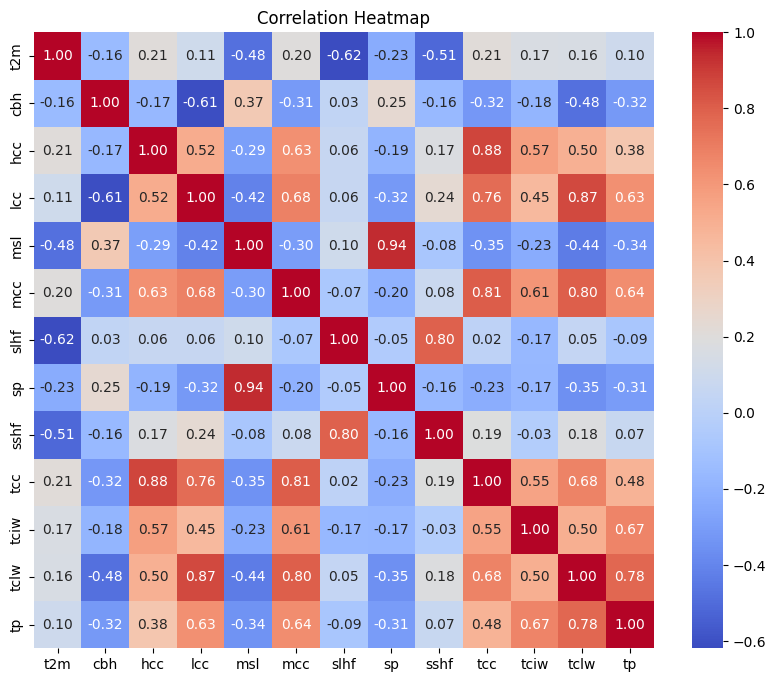

In [16]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

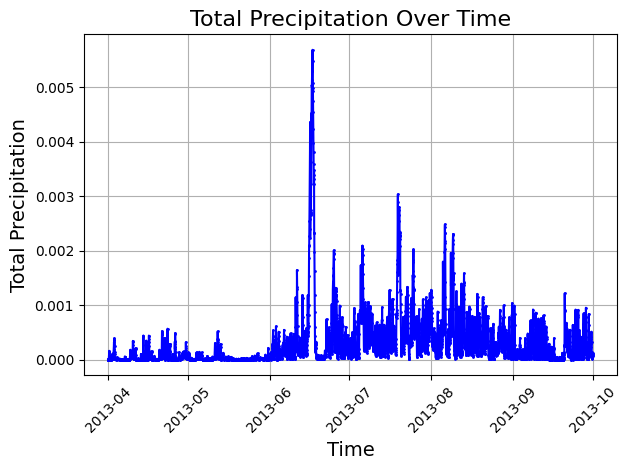

In [17]:
tp_agg = df.groupby('time')['tp'].mean()

plt.plot(tp_agg.index, tp_agg, linestyle='-', color='b', marker='o', markersize=1, label='Total Precipitation')
plt.title('Total Precipitation Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
def create_lagged_features(data, lags=5):
    df_lagged = data.copy()
    lagged_columns = []
    for var in data.columns:
        lagged_vars = [data[var].shift(lag) for lag in range(1, lags + 1)]
        lagged_columns.extend([f'{var}_lag{lag}' for lag in range(1, lags + 1)])
        df_lagged = pd.concat([df_lagged] + lagged_vars, axis=1)
    df_lagged.dropna(inplace=True)
    df_lagged.columns = data.columns.tolist() + lagged_columns
    return df_lagged

# Create lagged features
lags = 10
df_lagged = create_lagged_features(df, lags=lags)

# Split into train and test sets
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged[:train_size], df_lagged[train_size:]

X_train, y_train = train.drop(columns='tp'), train['tp']
X_test, y_test = test.drop(columns='tp'), test['tp']

In [71]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=6)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


RMSE: 8.902706999517193e-05


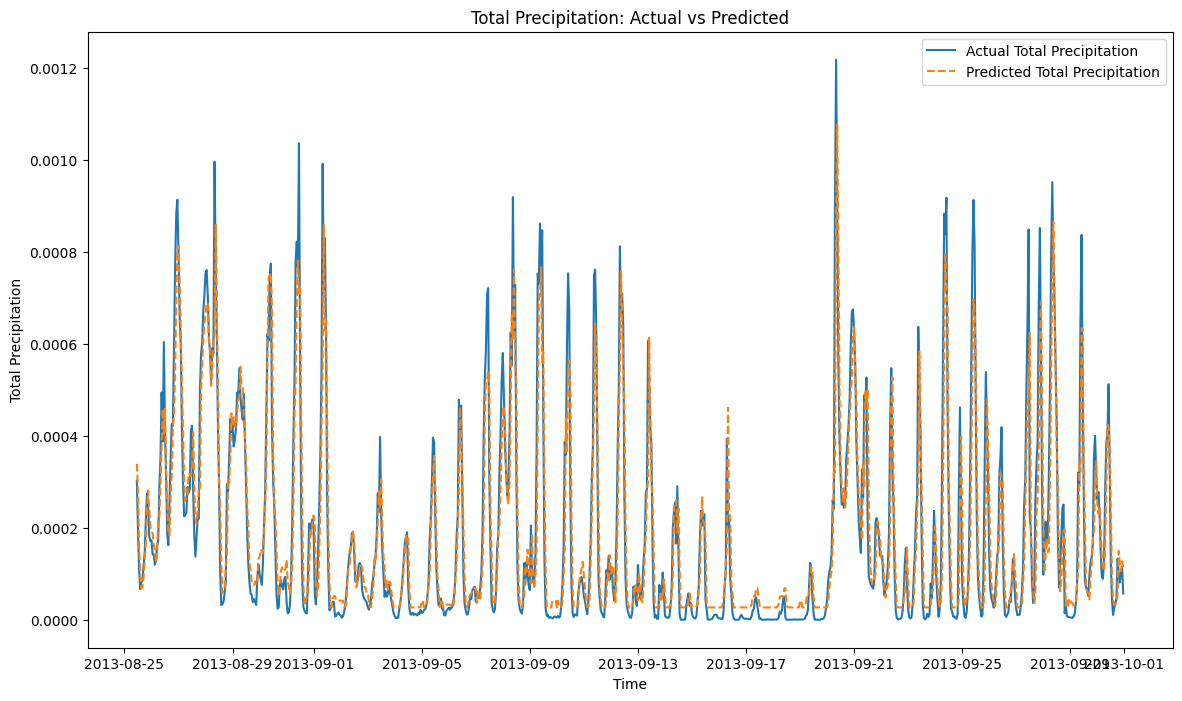

In [72]:
plt.figure(figsize=(14, 8))
plt.plot(test.index, y_test, label='Actual Total Precipitation')
plt.plot(test.index, y_pred, label='Predicted Total Precipitation', linestyle='dashed')
plt.title('Total Precipitation: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

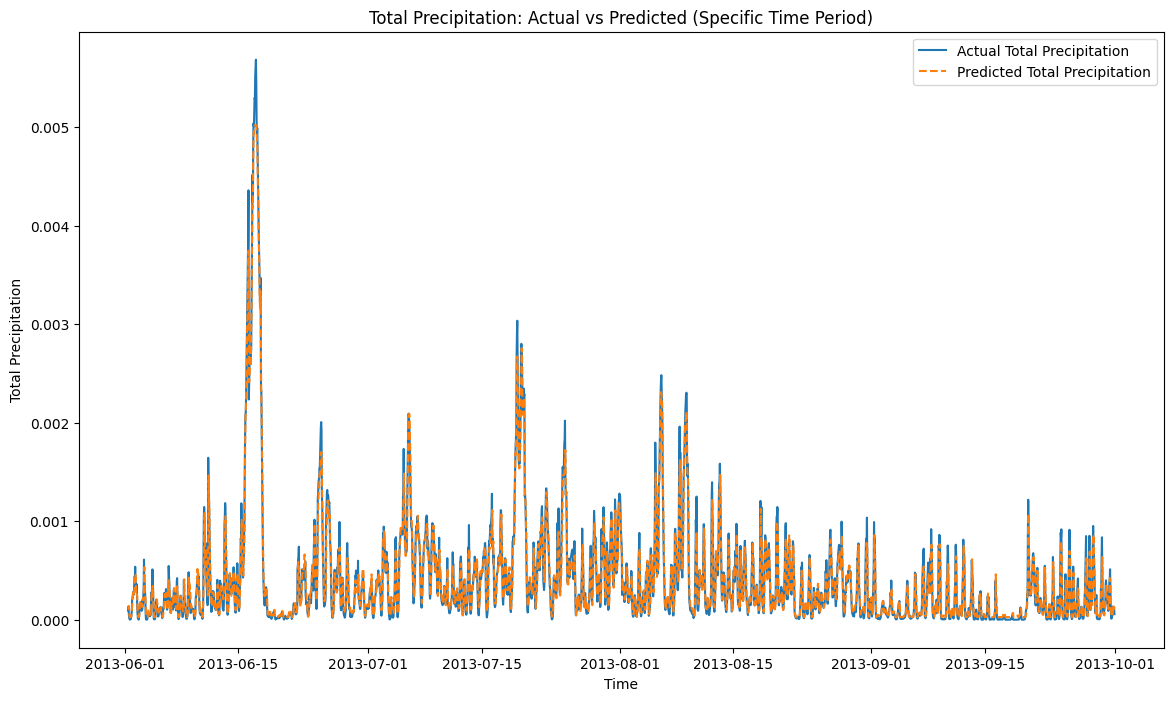

In [73]:
start_date = '2013-06-01'
end_date = '2024-07-10'

input_features = create_lagged_features(df.loc[start_date:end_date], lags=lags)
X_specific = input_features.drop(columns='tp')
y_specific_pred = model.predict(X_specific)

plt.figure(figsize=(14, 8))
plt.plot(input_features.index, input_features['tp'], label='Actual Total Precipitation')
plt.plot(input_features.index, y_specific_pred, label='Predicted Total Precipitation', linestyle='dashed')
plt.title('Total Precipitation: Actual vs Predicted (Specific Time Period)')
plt.xlabel('Time')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

In [74]:
nc_file = '/kaggle/input/test-data-ees/TEST.nc'
test_dataset = xr.open_dataset(nc_file)


data_vars = test_dataset.data_vars
time_series = {}

for var in data_vars:
    time_series[var] = test_dataset[var].mean(dim=('latitude', 'longitude')).to_series()

test_df = pd.DataFrame(time_series)

In [75]:
test_df.index = pd.to_datetime(test_df.index)
test_df = test_df.sort_index() 
test_df

,t2m,cbh,hcc,lcc,msl,mcc,slhf,sp,sshf,tcc,tciw,tclw,tp
time,,,,,,,,,,,,,
2014-06-01 00:00:00,286.146299,1897.453855,0.043185,0.195527,101056.496859,0.081891,-13832.355048,80171.831804,28867.868048,0.280552,0.004627,0.015712,0.000005
2014-06-01 01:00:00,286.500614,2402.896040,0.183157,0.273947,101132.582957,0.099070,-58813.941513,80225.413264,-3476.549438,0.456895,0.078509,0.044670,0.000003
2014-06-01 02:00:00,289.653028,1962.791780,0.406679,0.309085,101207.025836,0.122312,-182406.648274,80282.418665,-99725.604483,0.622940,0.157228,0.060964,0.000005
2014-06-01 03:00:00,290.884917,1918.812852,0.539572,0.305712,101280.729463,0.199524,-325910.468896,80354.803545,-273614.461560,0.697748,0.196855,0.061659,0.000004
2014-06-01 04:00:00,291.361770,2614.135734,0.540254,0.132881,101327.402013,0.286867,-454539.041893,80410.249527,-478953.715587,0.618163,0.170813,0.037965,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-30 19:00:00,290.508631,777.196977,0.419830,0.489975,100674.284479,0.552175,-47145.467326,79943.636935,6340.289271,0.855827,0.058492,0.170582,0.000597
2014-06-30 20:00:00,289.600325,791.850626,0.396447,0.458743,100679.681580,0.569716,-47758.002117,79943.554067,6449.225292,0.847465,0.065145,0.178615,0.000545
2014-06-30 21:00:00,289.725888,875.035656,0.362220,0.435815,100685.266179,0.578686,-47436.354155,79941.467309,8784.962611,0.830940,0.070277,0.173083,0.000467


In [76]:
test_df_lagged = create_lagged_features(test_df, lags=lags)

X_test_df = test_df_lagged.drop(columns='tp')

tp_predictions = model.predict(X_test_df)
len(tp_predictions),len(test_df)

(710, 720)

### Plot actual vs predicted total precipitation on unseen data


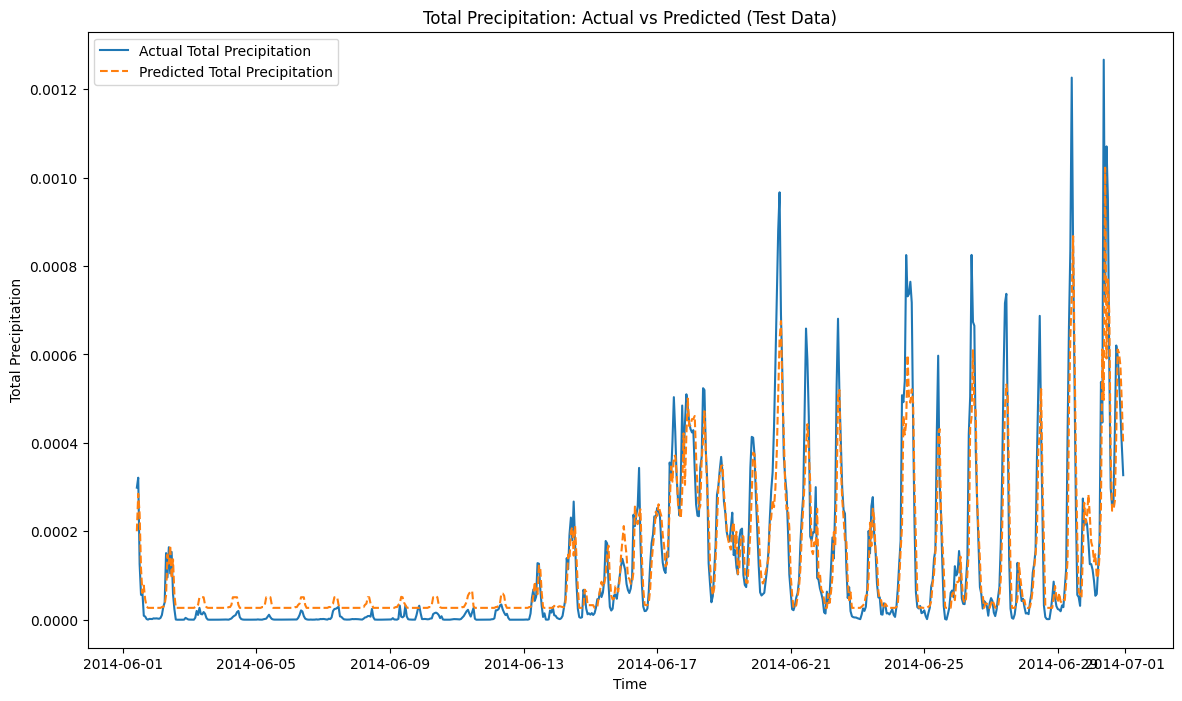

In [80]:
import numpy as np

adjusted_test_df = test_df.iloc[10:]

plt.figure(figsize=(14, 8))
plt.plot(adjusted_test_df.index, adjusted_test_df['tp'], label='Actual Total Precipitation')
plt.plot(adjusted_test_df.index, tp_predictions, label='Predicted Total Precipitation', linestyle='dashed')
plt.title('Total Precipitation: Actual vs Predicted (Test Data)')
plt.xlabel('Time')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()